In [1]:
import tensorflow as tf 

In [2]:
a = 3 # 在tf中不可以这样

In [13]:
#Create a varible.
w = tf.Variable([[0.5, 1.0]])
x = tf.Variable([[2.0], [1.0]])

y = tf.matmul(w, x)

# variables have to be explicitly initialized before you can run 
init_op = tf.global_variables_initializer()
with tf.Session() as sess :
    sess.run(init_op)
    print(y.eval())

[[2.]]


In [15]:
# float32
import numpy as np
mat = tf.zeros([3, 4], np.int32)

init_op2 = tf.global_variables_initializer()
with tf.Session() as sess :
    sess.run(init_op2)
    print(mat.eval())

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [17]:
norm = tf.random_normal([2, 3], mean = 1, stddev=4) # 均值、标准差
c = tf.constant([[1, 2], [3, 4], [5, 6]])
shuff = tf.random_shuffle(c)

sess = tf.Session()
print(sess.run(norm))
print(sess.run(c))
print(sess.run(shuff))

[[ 4.499954    1.0988601  -1.2193601 ]
 [-2.660518   -0.60204434  6.8280516 ]]
[[1 2]
 [3 4]
 [5 6]]
[[3 4]
 [1 2]
 [5 6]]


In [21]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
with tf.Session() as session:
    print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

[array([14.], dtype=float32)]


### 线性回归

In [22]:
import matplotlib.pyplot as plt

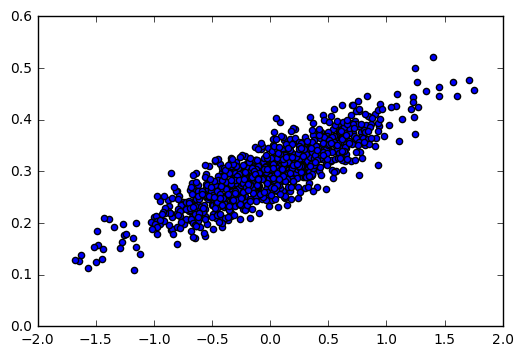

In [26]:
# 生成 1000 个点，围绕在 y = 0.1 * x + 0.3
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [ v[0] for v in vectors_set ]
y_data = [ v[1] for v in vectors_set ]

plt.scatter(x_data, y_data)
plt.show()

In [47]:
# 生成一维的W矩阵，取值是[-1, 1]之间的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="W")
b = tf.Variable(tf.zeros([1]), name = 'b')

y = W * x_data + b

# 以估计值与实际值之间的均方误差作为损失,均方误差：差值的平方和的平均数
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
#采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练过程最小化这个误差
train = optimizer.minimize(loss, name = 'train')

sess = tf.Session()

init_op3 = tf.global_variables_initializer()
sess.run(init_op3)

#初始化时的 W 与 b
print("W = ", sess.run(W), " b = ", sess.run(b), " loss = ", sess.run(loss))

for step in range(20) :
    sess.run(train)
    print("W = ", sess.run(W), " b = ", sess.run(b), " loss = ", sess.run(loss))

# writer = tf.train.SummarySaverHook("./tmp", sess.graph)


W =  [0.6924629]  b =  [0.]  loss =  0.19260736
W =  [0.5255502]  b =  [0.30860704]  loss =  0.050785623
W =  [0.40881905]  b =  [0.3061434]  loss =  0.027243547
W =  [0.32396084]  b =  [0.30442053]  loss =  0.01480286
W =  [0.26227382]  b =  [0.3031681]  loss =  0.008228639
W =  [0.21743092]  b =  [0.30225763]  loss =  0.004754524
W =  [0.1848327]  b =  [0.30159578]  loss =  0.0029186443
W =  [0.16113569]  b =  [0.30111468]  loss =  0.001948482
W =  [0.14390932]  b =  [0.30076492]  loss =  0.0014358044
W =  [0.13138674]  b =  [0.30051067]  loss =  0.0011648823
W =  [0.12228355]  b =  [0.30032584]  loss =  0.0010217148
W =  [0.11566605]  b =  [0.3001915]  loss =  0.00094605866
W =  [0.1108555]  b =  [0.30009383]  loss =  0.00090607844
W =  [0.10735852]  b =  [0.3000228]  loss =  0.0008849512
W =  [0.10481641]  b =  [0.2999712]  loss =  0.0008737866
W =  [0.10296845]  b =  [0.29993367]  loss =  0.0008678866
W =  [0.10162508]  b =  [0.2999064]  loss =  0.00086476887
W =  [0.10064854]  b 

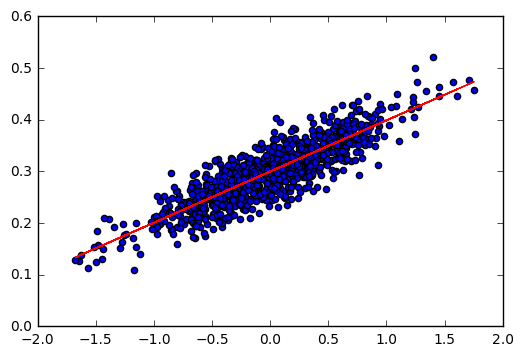

In [51]:
pre_y = sess.run(W) * x_data + sess.run(b)
plt.plot(x_data, pre_y, c='r')
plt.scatter(x_data, y_data)
plt.show()

### 手写体识别

In [7]:
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [9]:
print("类型 : ", type(mnist))
print("训练数据个数 ：", mnist.train.num_examples )
print("测试数据个数 ：", mnist.test.num_examples )

类型 :  <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
训练数据个数 ： 55000
测试数据个数 ： 10000


In [10]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [13]:
n_hidden_1 = 256 # 第一层隐藏层神经元个数
n_hidden_2 = 128 # 第二层隐藏层神经元个数
n_input = 784
n_ouput = 10

x = tf.placeholder("float", [None, n_input]) 
y = tf.placeholder("float", [None, n_ouput])
# None 代表占位的意思

stddev = 0.1
weights = {
    'w1':tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'w2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_ouput], stddev=stddev))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_ouput]))
}
print("初始化完成！")

初始化完成！


In [23]:
# 前向传播
def multilayer_perception(_X, _weights, _biases):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(_X, _weights['w1']), _biases['b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, _weights['w2']), _biases['b2']))
    return (tf.add(tf.matmul(layer_2, _weights['out']), _biases['out']))

pred = multilayer_perception(x, weights, biases)

#Loss and Optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optm = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
# 统计结果
corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) #  axis = 1, 取出每一行最大的数的索引 -> 得到布尔类型的 ndarray 
accr = tf.reduce_mean(tf.cast(corr, "float")) 
test = tf.cast(corr, "float")

# initializer
init = tf.global_variables_initializer()
print("finished init ")

finished init 


In [30]:
training_epochs = 20  # 所有数据总共迭代 20 次
batch_size = 100 # 每一批处理 100 个数据
display_step = 4  # 设置 4 个epoch打印中间结果一次

sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size) # 自己的数据集需要自己实现next_batch 其实就是一个滑动窗口
        feeds = {x : batch_x , y : batch_y}
        # x 为 batch_size * n_input 的大小的数据 含义为: batch_size组大小为 n_input 的数据
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(loss, feed_dict=feeds)
    avg_cost = avg_cost / total_batch # 一个 epoch下来的平均损失值大小
    
    if (epoch + 1) % display_step == 0 :
        print("第"+ str(epoch) +"轮 " + "该轮的平均损失值大小为 :" + str(avg_cost) )
        feeds = {x : mnist.train.images, y : mnist.train.labels}
        lst = sess.run(accr, feed_dict=feeds)
        train_acc = sess.run(accr, feed_dict=feeds)
        feeds = {x : mnist.test.images, y : mnist.test.labels}
        test_acc = sess.run(accr, feed_dict=feeds)
        print("训练集得分：" + str(train_acc) + "  " + "测试集得分：" + str(test_acc)) # 


第3轮 该轮的平均损失值大小为 :2.2816651474345813
训练集得分：0.16678181  测试集得分：0.1711
第7轮 该轮的平均损失值大小为 :2.2470836049860172
训练集得分：0.2987091  测试集得分：0.3093
第11轮 该轮的平均损失值大小为 :2.210026552026922
训练集得分：0.42261818  测试集得分：0.4397
第15轮 该轮的平均损失值大小为 :2.1682804198698564
训练集得分：0.53130907  测试集得分：0.5479
第19轮 该轮的平均损失值大小为 :2.1196189217133954
训练集得分：0.57665455  测试集得分：0.5903


In [35]:
batch_x, batch_y = mnist.train.next_batch(3) # 自己的数据集需要自己实现next_batch 其实就是一个滑动窗口
feeds = {x : batch_x , y : batch_y}
# x 为 batch_size * n_input 的大小的数据 含义为: batch_size组大小为 n_input 的数据

# corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) #  axis = 1, 取出每一行最大的数的索引 -> 得到布尔类型的 ndarray 
# accr = tf.reduce_mean(tf.cast(corr, "float")) 
# test = tf.cast(corr, "float")
print(sess.run(pred, feed_dict=feeds))

[[-0.32403028 -0.35108596 -0.14484414 -0.21976039 -0.30851233 -0.43687636
  -0.34378594 -0.35321918 -0.21214235 -0.37090558]
 [-0.15602565 -0.25482798 -0.3301782  -0.21771035 -0.41547215 -0.3805313
  -0.512411   -0.41374275 -0.5043347  -0.4695989 ]
 [-0.31735575 -0.14275128 -0.4255646  -0.07208582 -0.5446092  -0.34038377
  -0.3996802  -0.33947578 -0.42339003 -0.44876143]]


In [36]:
print(sess.run(y, feed_dict=feeds))

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [37]:
print(sess.run(test, feed_dict=feeds)) # 说明第2/3张图片预测是对的

[0. 1. 1.]


In [38]:
print(sess.run(corr, feed_dict=feeds))

[False  True  True]


In [39]:
print(sess.run(accr, feed_dict=feeds)) # 2 / 3 = 0.6 | 6循环

0.6666667
